Calcium and Excitation-Contraction Coupling in the Heart
==============================
Eisner, Caldwell, Kistamas, Trafford (2017) Circulation Research

https://doi.org/10.1161/CIRCRESAHA.117.310230

In this notebook I try to reproduce some examples given in this paper

    

Model
-----
A novel computational model of the human ventricular action potential and Ca transient  
Eleonora Grandi, Francesco S. Pasqualini, Donald M. Bers,  
2010, Journal of Molecular and Cellular Cardiology, volume 48, 112-121.  
   
https://doi.org/10.1016/j.yjmcc.2009.09.019

Model calcium and subspaces
-------------------------------
> For example, the increase in [Ca] upon Ca-induced Ca release appears to be higher just under the sarcolemma than in bulk cytosol, and this higher [Ca] is detected by Na–Ca exchanger (NCX) [13]. Here we have taken advantage of the rabbit ECC model developed by Shannon et al. [2], which includes this additional subsarcolemmal compartment (SL) and provides a detailed description of Ca handling.

From Shannon (https://doi.org/10.1529/biophysj.104.047449)

![title](shannon-diagram.png)

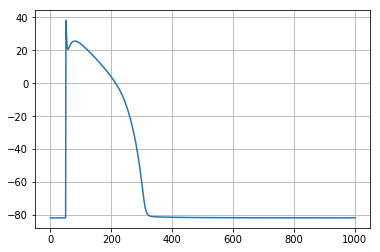

In [2]:
import myokit

m = myokit.load_model('grandi-2010.mmt')

cl = 1000
p = myokit.pacing.blocktrain(cl, 0.5, offset=50)

s = myokit.Simulation(m, p)
d = s.run(cl)

import matplotlib.pyplot as pl
pl.figure()
pl.plot(d.time(), d['membrane.V'])
pl.show()


Example 1
----------
> In the steady state, on each cardiac cycle, the amount of Ca entering the cell must equal that pumped out. If not, the cell would either gain or lose Ca. Imbalances between Ca entry and exit can only occur transiently and then result in changes of the amplitude of the Ca transient and thence contractility. One well-known example is the effect of changing frequency or pausing stimulation. If stimulation is stopped in ventricular muscle from most nonrodent species, Ca leaks out of the SR, SR content decreases, and therefore the first stimulus results in a small Ca transient and contraction. Because the Ca transient is small, less Ca is pumped out of the cell than enters and the cell is not in Ca flux balance. This results in an increase of SR Ca content until the Ca transient increases sufficiently that the Ca efflux now balances influx and the cell is back in a steady state. In the steady state, however, influx and efflux must be equal.


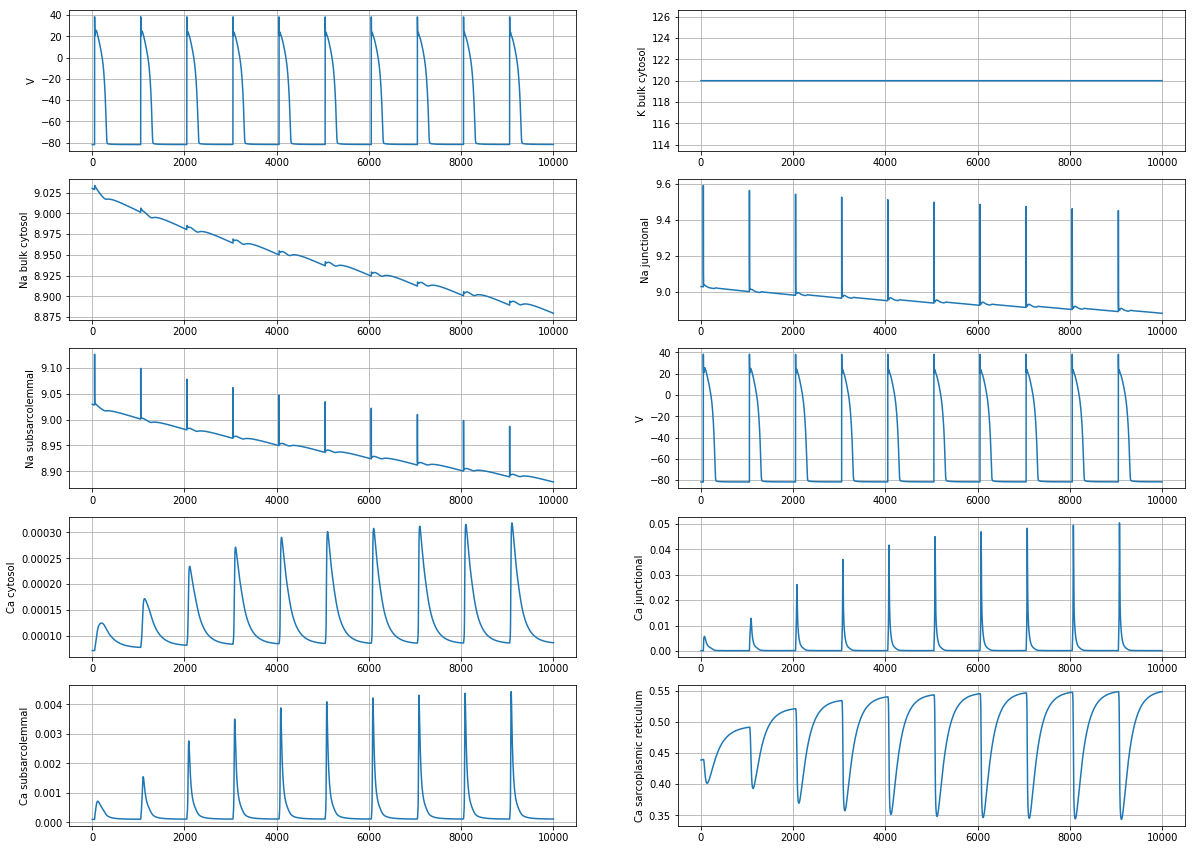

In [3]:
# Show drift in ion balances
def plot_concentrations(d):
    pl.figure(figsize=(20,15))
    pl.subplot(5,2,1)
    pl.plot(d.time(), d['membrane.V'])
    pl.ylabel('V')
    pl.subplot(5,2,2)
    pl.plot(d.time(), d['potassium.K_i'])
    pl.ylabel('K bulk cytosol')
    pl.subplot(5,2,3)
    pl.plot(d.time(), d['sodium.Na_i'])
    pl.ylabel('Na bulk cytosol')
    pl.subplot(5,2,4)
    pl.plot(d.time(), d['sodium.Na_j'])
    pl.ylabel('Na junctional')
    pl.subplot(5,2,5)
    pl.plot(d.time(), d['sodium.Na_sl'])
    pl.ylabel('Na subsarcolemmal')
    pl.subplot(5,2,6)
    pl.plot(d.time(), d['membrane.V'])
    pl.ylabel('V')
    pl.subplot(5,2,7)
    pl.plot(d.time(), d['calcium.Ca_i'])
    pl.ylabel('Ca cytosol')
    pl.subplot(5,2,8)
    pl.plot(d.time(), d['calcium.Ca_j'])
    pl.ylabel('Ca junctional')
    pl.subplot(5,2,9)
    pl.plot(d.time(), d['calcium.Ca_sl'])
    pl.ylabel('Ca subsarcolemmal')
    pl.subplot(5,2,10)
    pl.plot(d.time(), d['bufca3.Ca_sr'])
    pl.ylabel('Ca sarcoplasmic reticulum')
    pl.show()

# Show initial drift
s.reset()
plot_concentrations(s.run(cl * 10))

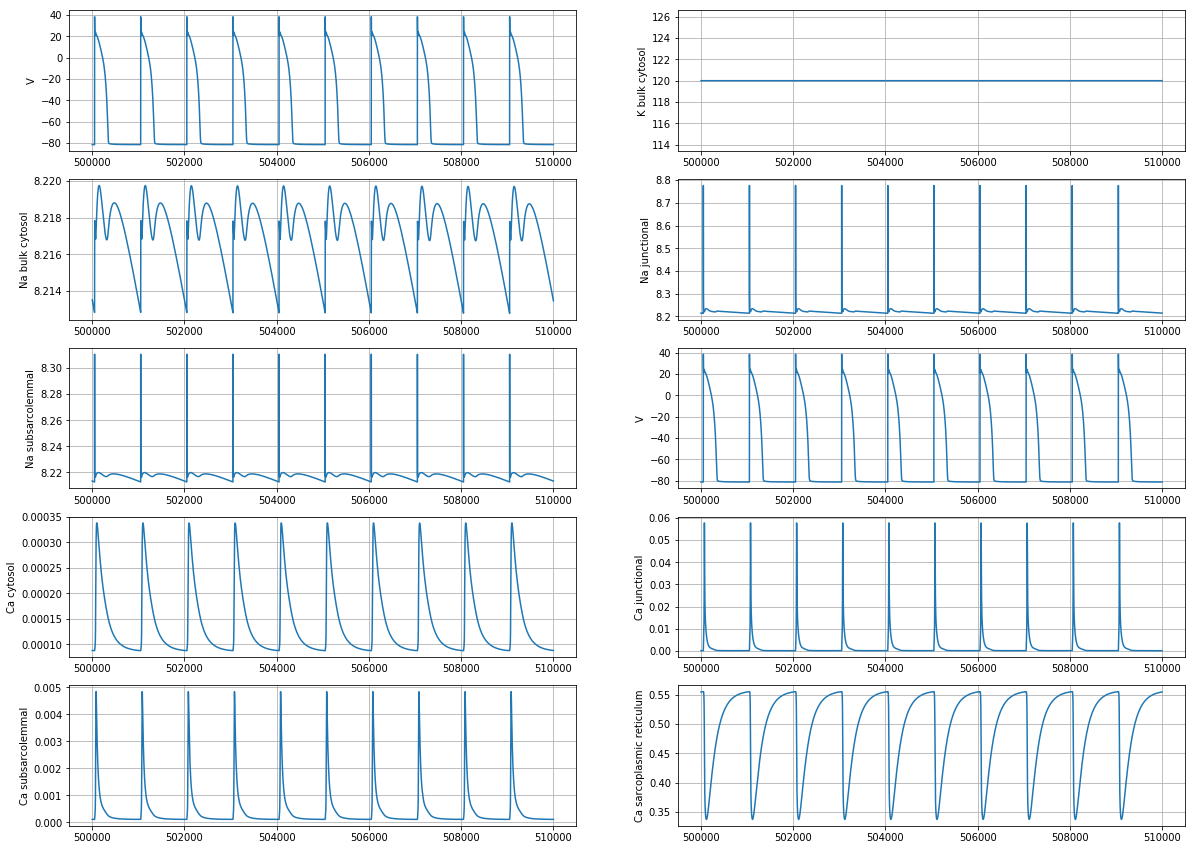

In [4]:
# Pace to steady state
s.reset()
s.run(1000 * 500)
steady_state = s.state()

# Show reduced drift
plot_concentrations(s.run(cl * 10))

> If stimulation is stopped in ventricular muscle from most nonrodent species, Ca leaks out of the SR




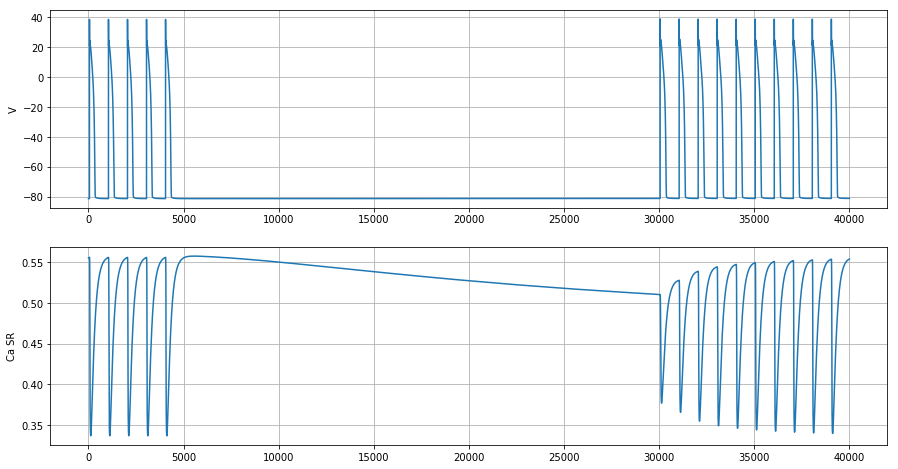

In [5]:
# Make sure we always start from same steady state
s.reset()
s.set_state(steady_state)

s.set_protocol(p)
d = s.run(5*cl)
s.set_protocol(None)
d = s.run(25*cl, log=d)
s.set_protocol(p)
d = s.run(10*cl, log=d)
d = d.npview()

pl.figure(figsize=(15, 8))
pl.subplot(2,1,1)
pl.ylabel('V')
pl.plot(d['engine.time'], d['membrane.V'])
pl.subplot(2,1,2)
pl.plot(d['engine.time'], d['bufca3.Ca_sr'])
pl.ylabel('Ca SR')
pl.show()

> SR content decreases, and therefore the first stimulus results in a small Ca transient and contraction.

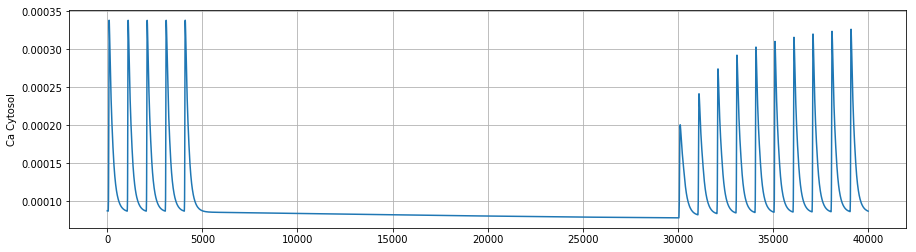

In [6]:
pl.figure(figsize=(15, 4))
pl.ylabel('Ca Cytosol')
pl.plot(d['engine.time'], d['calcium.Ca_i'])
pl.show()


> Because the Ca transient is small, less Ca is pumped out of the cell than enters and the cell is not in Ca flux balance. This results in an increase of SR Ca content until the Ca transient increases sufficiently that the Ca efflux now balances influx and the cell is back in a steady state. In the steady state, however, influx and efflux must be equal.

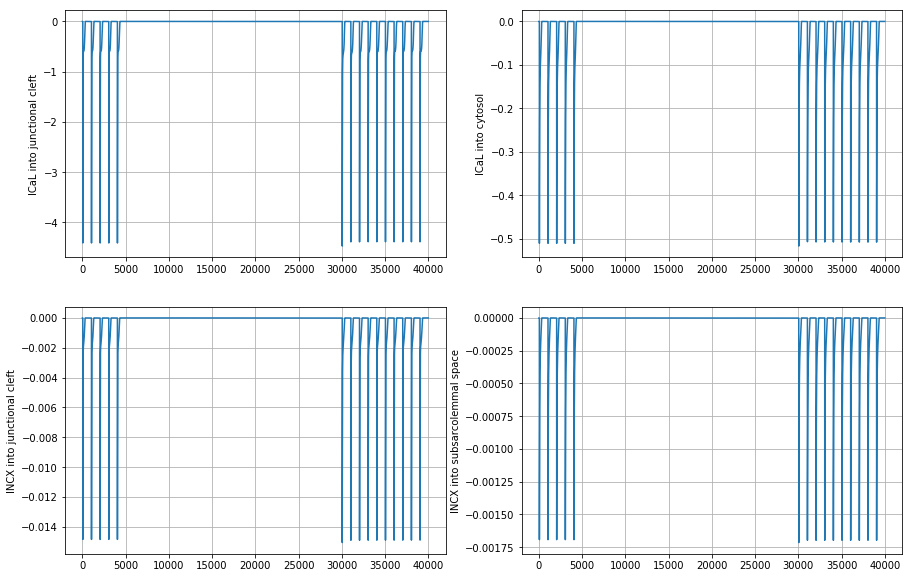

In [8]:
pl.figure(figsize=(15, 10))
pl.subplot(2,2,1)
pl.ylabel('ICaL into junctional cleft')
pl.plot(d['engine.time'], d['ical.I_Ca_junc'])
pl.subplot(2,2,2)
pl.ylabel('ICaL into cytosol')
pl.plot(d['engine.time'], d['ical.I_Ca_sl'])
pl.subplot(2,2,3)
pl.ylabel('INCX into junctional cleft')
pl.plot(d['engine.time'], d['ical.I_CaNa_junc'])
pl.subplot(2,2,4)
pl.ylabel('INCX into subsarcolemmal space')
pl.plot(d['engine.time'], d['ical.I_CaNa_sl'])
pl.show()